# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
  ```



I use the 2nd methode which is not spliting exactly in 1/7 but close enough to say it's fine

In [9]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


Plot a single sample of each digit as the original image


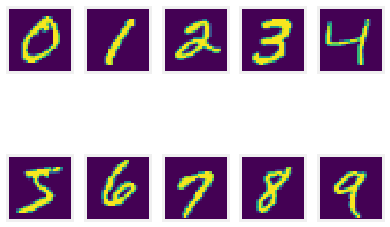

In [14]:
print("Plot a single sample of each digit as the original image")
fig = plt.figure(figsize=(6,5))

for digit in range(10):
    ax = fig.add_subplot(2, 5, digit + 1, xticks=[], yticks=[])
    x_c = x_train[y_train==digit][0]
    ax.imshow(x_c.reshape(28, 28))

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
P(y/x) = P(x/y)*P(y)/P(x)


y: label (digit from 0 to 9)


x:features (pixels)


P(y/x): probability of label knowing the feature


P(y): probability of the class


P(x/y): probability of having this pixel vector for this label


P(x): probal of this sample

we will maximize the P(y/x). P(x) is not so important as it's constant per sample

Bonus: if a pixel has a color which has never been seen in the training set the model will give 0 for every classes. 


#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [3]:
# code goes here
import numpy  as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

NB = BernoulliNB(binarize=0)
# NB = GaussianNB()
NB.fit(x_train, y_train)


BernoulliNB(alpha=1.0, binarize=0, class_prior=None, fit_prior=True)

Generating mean image of each class


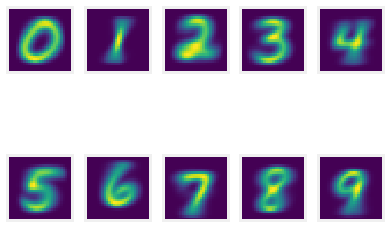

In [16]:
print("Generating mean image of each class")
fig = plt.figure(figsize=(6,5))


for c in range(10):
    ax = fig.add_subplot(2, 5, c + 1, xticks=[], yticks=[])
    x_c = x_train[y_train==c].mean(axis=0)
    ax.imshow(x_c.reshape(28, 28))

Generating digit from proba


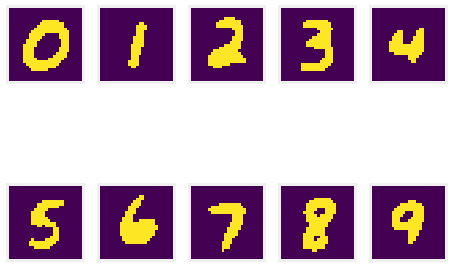

In [17]:
print("Generating digit from proba")
threshold = -0.58
digit_prob = NB.feature_log_prob_
fig = plt.figure(figsize=(7,6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    pic = np.where(digit_prob[i] > threshold, 1, 0)
    ax.imshow(pic.reshape(28, 28))

[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]

we are confusing 3 for 5 and 9 for 4. but Bayes rocks


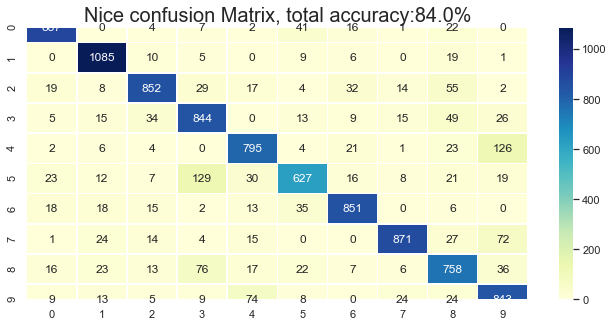

In [19]:
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_hat = NB.predict(x_test)
cm = confusion_matrix(y_test, y_hat)
print(cm)
plt.figure(figsize = (10,5))
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
# total_acc = np.trace(cm) / y_hat.shape[0]
total_acc = accuracy_score(y_test, y_hat)
print("")
a= ax.set_title("Nice confusion Matrix, total accuracy:{}%".format(round(total_acc*100)),fontsize=20)
print("we are confusing 3 for 5 and 9 for 4. but Bayes rocks")


best k:109, score:0.8467


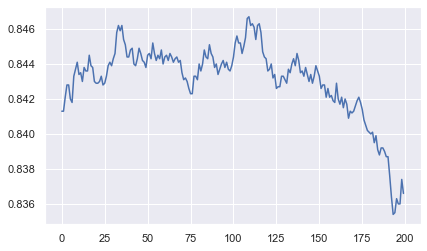

In [20]:
from tqdm.auto import tqdm

# I was curious so I try to implement it
# in real life I would have run it on validation set

score = []
themax = 200
for k in tqdm(range(themax)):
    NB = BernoulliNB(binarize=k)
    NB.fit(x_train, y_train)
    y_hat = NB.predict(x_test)
    score.append(accuracy_score(y_test, y_hat))

best_k = np.argmax(score)
print("best k:{}, score:{}".format(best_k, score[best_k]))
plt.plot(score)

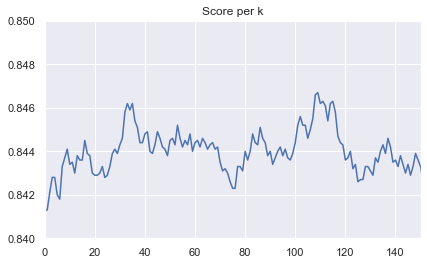

In [21]:
plt.xlim(0,150)
plt.ylim(0.84,0.85)
plt.title("Score per k")
plt.plot(score)

#no big improvement 

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [74]:
from sklearn.datasets import fetch_20newsgroups


data = fetch_20newsgroups( remove=('headers', 'footers', 'quotes'))
X = np.array(data.data)
y = np.array(data.target)

print(X.shape)
print(y.shape)
print(np.unique(y))

(11314,)
(11314,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
Xv = vectorizer.fit_transform(X)

In [77]:
nbWord = Xv.toarray().shape[1]
print("There are {} words".format(nbWord))

There are 101322 words


In [78]:
import string

def print_txt(txt, hot, cold):
    """
    print the text, coloring hot and cold words with colors
    """
    cold_color='\x1b[41;37m{}\x1b[0m'
    hot_color='\x1b[42;37m{}\x1b[0m'
    def color(token):
        lower = str(token).lower()
        lower = lower.replace('\t','').replace('\n','')
        lower = lower.translate(string.punctuation)
        if (lower in hot) and (lower in cold):
            return mid_color.format(token)
        elif lower in hot:
            return hot_color.format(token)
        elif lower in cold:
            return cold_color.format(token)
        else:
            return token
    colored_txt = " ".join([color(token) for token in txt.split(' ')])
    print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [101]:
class NaiveBayes(BaseEstimator, ClassifierMixin):

    def _preprocess(self, x):
        nb_sample, nb_feature = x.shape
        freq = x.toarray()
        nb_words = np.sum(freq, axis=1, keepdims=True)
        freq = (freq + 1) / (nb_words + nb_feature)
        return freq
    
    def fit(self, x, y):
        freq = self._preprocess(x)
        self._y_class, class_count = np.unique(y, return_counts=True)
        self._p_class = class_count / y.shape[0]
        self._p_doc_given_class = []
        for i, c in enumerate(self._y_class):
            xc = freq[y == c]
            nb_doc, nb_feature = xc.shape
            nb_word_per_doc_c = xc.sum(axis=0)
            self._p_doc_given_class.append(nb_word_per_doc_c / nb_doc)
        
    def predict_log_proba(self, x):
        y_hat = []
        freq = x.toarray()
        for i, c in enumerate(self._y_class):
            score = np.dot(freq, np.log(self._p_doc_given_class[i]))
            score += np.log(self._p_class[i])
            y_hat.append(score)
        return np.vstack(y_hat)
    
    def predict(self, x):
        ret = self.predict_log_proba(x)
        return ret.argmax(axis=0)

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

pipeline = make_pipeline(CountVectorizer(input='content', stop_words='english', max_df = 1.0, min_df=0, max_features=1000), NaiveBayes())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'accuracy of my NaiveBayes model: {acc}')
print(f'classification report of my NaiveBayes model\n: {cr}')

accuracy of my NaiveBayes model: 0.4325120514193894
classification report of my NaiveBayes model
:               precision    recall  f1-score   support

           0       0.67      0.03      0.05       148
           1       0.45      0.42      0.43       175
           2       0.67      0.30      0.41       191
           3       0.43      0.57      0.49       197
           4       0.84      0.25      0.38       197
           5       0.41      0.74      0.53       188
           6       0.68      0.62      0.65       188
           7       0.78      0.38      0.51       207
           8       0.91      0.25      0.39       212
           9       0.44      0.21      0.28       186
          10       0.33      0.71      0.45       184
          11       0.45      0.71      0.55       209
          12       0.70      0.22      0.33       199
          13       0.47      0.28      0.35       194
          14       0.64      0.44      0.52       193
          15       0.23      0.88   

In [111]:
from sklearn.naive_bayes import MultinomialNB

pipeline = make_pipeline(CountVectorizer(input='content', stop_words='english', max_df = 1.0, min_df=0, max_features=1000), MultinomialNB())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'accuracy of sklearn MultinomialNB: {acc}')
print(f'classification report of sklearn MultinomialNB\n: {cr}')

accuracy of sklearn MultinomialNB: 0.5176754151044456
classification report of sklearn MultinomialNB
:               precision    recall  f1-score   support

           0       0.39      0.51      0.44       148
           1       0.48      0.52      0.50       175
           2       0.75      0.02      0.03       191
           3       0.38      0.56      0.45       197
           4       0.52      0.58      0.55       197
           5       0.64      0.65      0.65       188
           6       0.69      0.64      0.66       188
           7       0.54      0.59      0.56       207
           8       0.45      0.54      0.49       212
           9       0.52      0.60      0.56       186
          10       0.34      0.40      0.37       184
          11       0.80      0.63      0.70       209
          12       0.52      0.50      0.51       199
          13       0.50      0.64      0.57       194
          14       0.69      0.44      0.54       193
          15       0.56      0.6

We got a slightly better result with the official bayes function

#### same test with TfidfVectorizer

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer

pipeline = make_pipeline(TfidfVectorizer(input='content', stop_words='english', max_df = 1.0, min_df=0, max_features=1000), NaiveBayes())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'accuracy of my NaiveBayes model with TfidfVectorizer: {acc}')
print(f'classification report of my NaiveBayes model with TfidfVectorizer\n: {cr}')

accuracy of my NaiveBayes model with TfidfVectorizer: 0.2054097482592394
classification report of my NaiveBayes model with TfidfVectorizer
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       148
           1       0.28      0.58      0.38       175
           2       0.72      0.38      0.50       191
           3       0.72      0.13      0.22       197
           4       0.00      0.00      0.00       197
           5       0.75      0.55      0.64       188
           6       0.87      0.29      0.44       188
           7       0.91      0.05      0.09       207
           8       1.00      0.02      0.04       212
           9       0.53      0.11      0.18       186
          10       0.07      0.99      0.12       184
          11       0.97      0.17      0.29       209
          12       0.00      0.00      0.00       199
          13       1.00      0.03      0.05       194
          14       0.97      0.18      0.31     

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
pipeline = make_pipeline(TfidfVectorizer(input='content', stop_words='english', max_df = 1.0, min_df=0, max_features=1000), MultinomialNB())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(f'accuracy of sklearn MultinomialNB: {acc}')
print(f'classification report of sklearn MultinomialNB\n: {cr}')

accuracy of sklearn MultinomialNB: 0.5779325120514194
classification report of sklearn MultinomialNB
:               precision    recall  f1-score   support

           0       0.42      0.42      0.42       148
           1       0.54      0.60      0.57       175
           2       0.61      0.58      0.59       191
           3       0.49      0.57      0.53       197
           4       0.67      0.49      0.56       197
           5       0.68      0.76      0.72       188
           6       0.64      0.69      0.66       188
           7       0.60      0.58      0.59       207
           8       0.58      0.47      0.52       212
           9       0.52      0.54      0.53       186
          10       0.43      0.72      0.54       184
          11       0.83      0.71      0.77       209
          12       0.58      0.48      0.52       199
          13       0.49      0.70      0.57       194
          14       0.61      0.54      0.57       193
          15       0.52      0.7

#### TfidfVectorizer improves the official naive Baye but damages my implementation

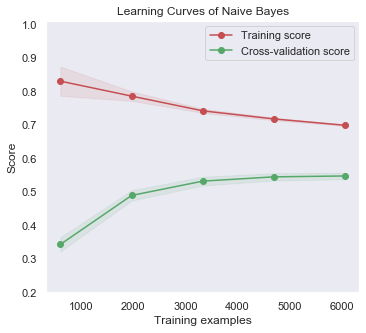

The model is in the biais regime


In [116]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
    
fig, axes = plt.subplots(1,1, figsize=(5, 5))
axes.set_title("Learning Curves of Naive Bayes")
axes.set_ylim(*(0.2, 1.01))
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)  
axes.grid()
axes.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axes.legend(loc="best")

plt.show()
print("The model is in the biais regime")

The model is in the biais regime